# **Part 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Test the model on test set
5. Tune the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data after outlier and missing value treatment (result from Part 1)
df=pd.read_csv('hmeq_m2.csv')

## **Data Preparation**

### **Separating the target variable from other variables**

In [4]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(['Unnamed: 0', 'BAD'], inplace=False, axis=1)

In [5]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
to_get_dummies_for = ['REASON', 'JOB']
X = pd.get_dummies(data=X, columns=to_get_dummies_for, drop_first=True)

# Create y(dependent varibale)
y = df.BAD

### **Splitting the data into 70% train and 30% test set**

In [6]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [7]:
# Checking the shape of the train and test data
print("Shape of the training set: ", x_train.shape)   
print("Shape of the test set: ", x_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
0    0.800575
1    0.199425
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.800336
1    0.199664
Name: BAD, dtype: float64


## **Model Evaluation Criterion**

#### Model can make wrong predictions in the following ways: 
1. Predicting an customer will default and the customer doesn't default in reality (False Positive)
2. Predictin an customer will not default and the customer defaults in reality (False Negative).

**False Negative** is more important or more expensive/damaging.
To Reduce this loss, the bank wants the **Recall** to be maximized. Greater the recall higher the chances of minimizing false negatives.

In [8]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    plt.figure(figsize=(8,5))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Model 1: Logistic Regression Model

In [9]:
# Defining the Logistic regression model
lr = LogisticRegression(solver='newton-cg', random_state=1) 

# Fitting the model on the training data 
lr.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3340
           1       0.80      0.62      0.70       832

    accuracy                           0.89      4172
   macro avg       0.85      0.79      0.82      4172
weighted avg       0.89      0.89      0.89      4172



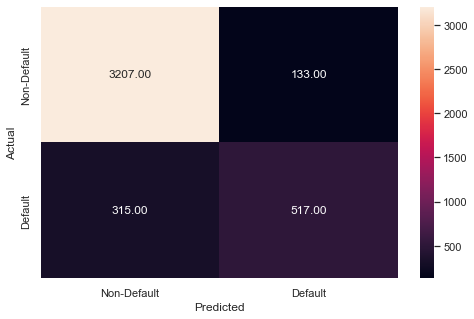

In [10]:
#Predict for train set
y_pred_train_lr = lr.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train_lr)

**Observations** 
* Originally, the default solver gave a very bad result - the most important metric, class 1 recall score, is close to 0. That means the model fails to pick up defaulted borrowers almost completely.
* After changing the solver to 'newtown-cg', the model is performing much better, with class 1 recall over 60%. 

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.77      0.60      0.68       357

    accuracy                           0.88      1788
   macro avg       0.84      0.78      0.80      1788
weighted avg       0.88      0.88      0.88      1788



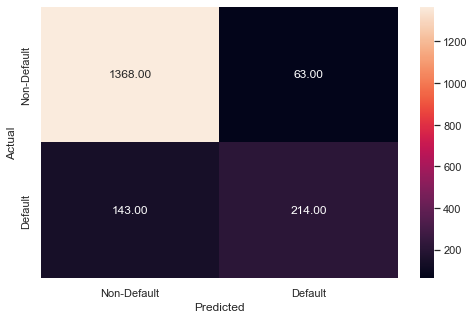

In [11]:
#Predict for test set
y_pred_test_lr = lr.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test_lr)

**Observations:**
* Accuracy is 88%
* Class 1 recall on train and test data are both slightly over 60%
* The model is slightly overfitting

#### Check the coefficients and which variables are important, and how they affect the process of loan approval

In [12]:
# Printing the coefficients of logistic regression
cols = X.columns
coef_lr = lr.coef_
pd.DataFrame(coef_lr, columns = cols).T.sort_values(by=0, ascending = False)

,0
DEBTINC_missing_values_flag,2.452695
VALUE_missing_values_flag,2.033381
CLAGE_missing_values_flag,1.056436
CLNO_missing_values_flag,1.039447
DELINQ,0.750513
DEROG,0.505769
MORTDUE_missing_values_flag,0.454762
JOB_Sales,0.362301
JOB_Self,0.096981
REASON_HomeImp,0.096458


**Insights:**

**Features which positively affect on the default are:**

DEBTINC_missing_values_flag	
VALUE_missing_values_flag	
CLAGE_missing_values_flag	
CLNO_missing_values_flag	
DELINQ	
DEROG	
MORTDUE_missing_values_flag	
JOB_Sales	
JOB_Self

The coefficients that positively and negatively affect the default are quite consistent with the EDA findings.

**The above Logistic regression model was build on the threshold of 0.5, Let's try different threshold to improve the performance.**

The Precision-Recall Curve for Logistic Regression

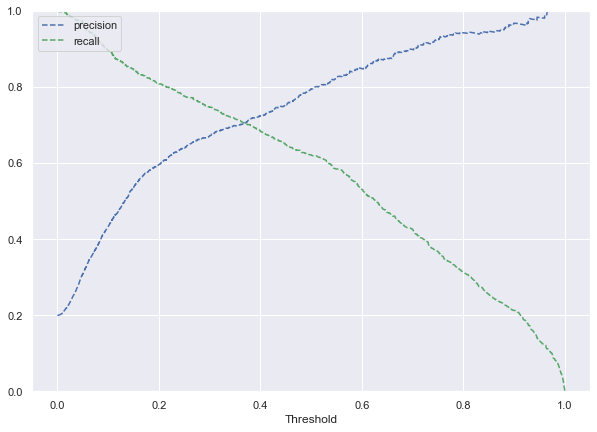

In [13]:
# predict_proba gives the probability of each observation belonging to each class
y_scores_lr=lr.predict_proba(x_train)

# save the output in objects
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:,1])  

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label='precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**

- The precision and the recall are balanced for a threshold of about ~0.36.

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3340
           1       0.70      0.71      0.71       832

    accuracy                           0.88      4172
   macro avg       0.81      0.82      0.82      4172
weighted avg       0.88      0.88      0.88      4172



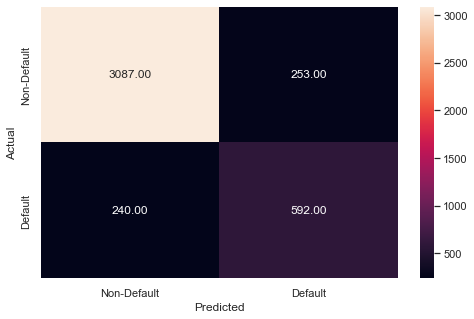

In [14]:
# check the model performance at this threshold
optimal_threshold1=0.36
y_pred_train= lr.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)            

**Observations:**

- The model performance has imported on the train data.  The recall has increased for class 1 to over 70%.

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1431
           1       0.70      0.68      0.69       357

    accuracy                           0.88      1788
   macro avg       0.81      0.80      0.81      1788
weighted avg       0.88      0.88      0.88      1788



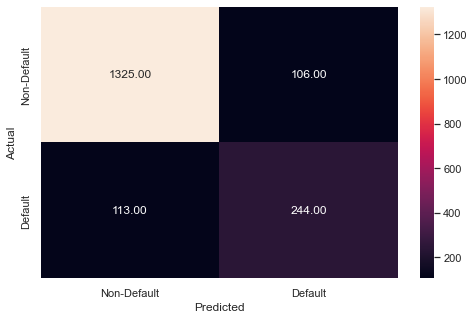

In [15]:
# check the performance on the test data
optimal_threshold1=0.36
y_pred_test= lr.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)            

**Observations:**

- The model is giving a similar performance on the test and the train datasets, i.e., the model is giving a generalized performance.
- The recall of the test data has slightly increased while at the same time, the precision has decreased quite significantly for class 1, which is to be expected while adjusting the threshold. 
- However, the recall score of class 1 is still 0.68 for test data, this is still a bit low. We need to try other algorithms to hopefully improve the class 1 recall. 

###  **Model 2: Linear Discriminant Analysis (LDA) model**

In [16]:
# Fitting the LDA model
lda=LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3340
           1       0.73      0.67      0.70       832

    accuracy                           0.88      4172
   macro avg       0.82      0.80      0.81      4172
weighted avg       0.88      0.88      0.88      4172



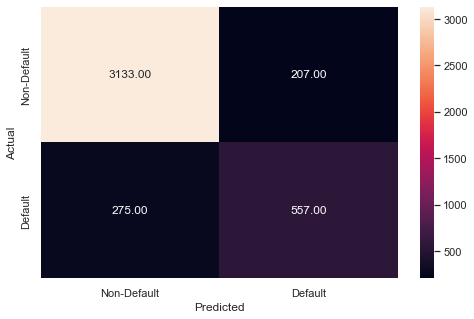

In [17]:
# Checking model performance of LDA
y_pred_train_lda=lda.predict(x_train)
metrics_score(y_train, y_pred_train_lda)

check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition.

In [18]:
# Creating the list of column names for adding to the coef table
cols=X.columns

# Saving coefficients of LDA model
coef_lda=lda.coef_    

# Printing the cofficients of LDA
pd.DataFrame(coef_lda,columns=cols).T.sort_values(by=0, ascending=False)

,0
VALUE_missing_values_flag,4.595808
DEBTINC_missing_values_flag,4.421234
CLNO_missing_values_flag,1.689054
CLAGE_missing_values_flag,1.474884
JOB_Sales,1.117677
DELINQ,0.904899
MORTDUE_missing_values_flag,0.829878
DEROG,0.695094
JOB_Self,0.304405
REASON_HomeImp,0.255554


**Some features which positively affect the Attrition rate are:**
- VALUE_missing_values_flag	
- DEBTINC_missing_values_flag
- CLNO_missing_values_flag
- CLAGE_missing_values_flag
- JOB_Sales
- DELINQ

### **Precision-Recall Curve for LDA**

**The Precision-Recall curve summarizes the trade-off between the precision and the recall for a predictive model using different probability thresholds.**

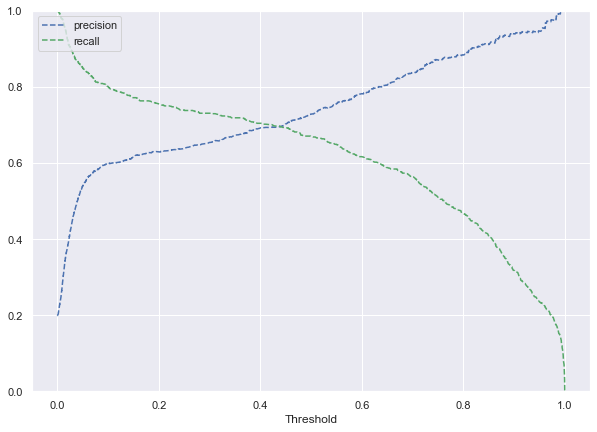

In [19]:
# predict_proba gives the probability of each observation belonging to each class 
y_scores_lda=lda.predict_proba(x_train)  
precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label= 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**

- We can see that the precision and the recall are balanced for a threshold of about ~0.45.

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3340
           1       0.70      0.69      0.70       832

    accuracy                           0.88      4172
   macro avg       0.81      0.81      0.81      4172
weighted avg       0.88      0.88      0.88      4172



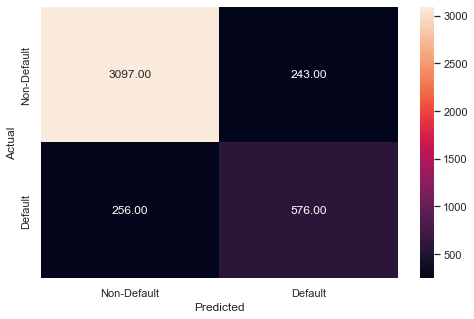

In [24]:
# check the model performance at this threshold
optimal_threshold1=0.45
y_pred_train_lda= lda.predict_proba(x_train)
metrics_score(y_train, y_pred_train_lda[:,1]>optimal_threshold1)            

**Observations:**

- The precision has dropped slightly but **the recall for class 1 has increased to 0.69**; the class and metric of interest here.

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1431
           1       0.71      0.68      0.69       357

    accuracy                           0.88      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.88      0.88      0.88      1788



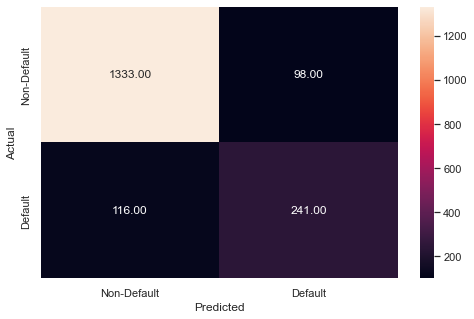

In [25]:
# Checking performance on the test data
optimal_threshold1=0.45
y_pred_test_lda= lda.predict_proba(x_test)
metrics_score(y_test, y_pred_test_lda[:,1]>optimal_threshold1)    

**Observations:**

- The model is giving a **similar performance on the test and the train data**, meaning the model has generalized well.
- **The average recall and the precision for the model are good**.

###  **Model 3: Quadratic Discriminant Analysis (QDA) model**

In [26]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3340
           1       0.64      0.57      0.60       832

    accuracy                           0.85      4172
   macro avg       0.77      0.75      0.75      4172
weighted avg       0.84      0.85      0.85      4172



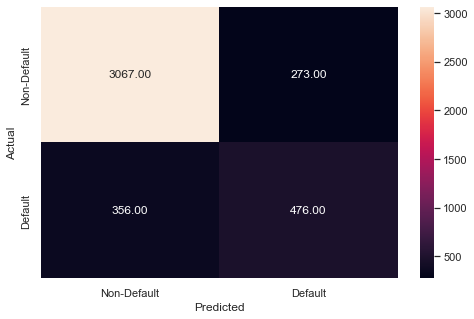

In [27]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(x_train)
metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1431
           1       0.70      0.53      0.60       357

    accuracy                           0.86      1788
   macro avg       0.79      0.73      0.76      1788
weighted avg       0.85      0.86      0.85      1788



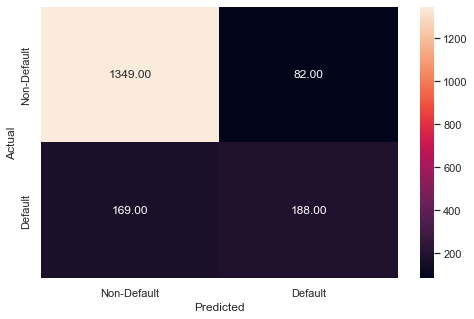

In [28]:
# Checking performance of the model on the test data
y_pred_test_qda = qda.predict(x_test)
metrics_score(y_test, y_pred_test_qda)

**Observations**
* The QDA model gives a recall score slightly over 50% which is too low. This may not be a good model to use.

### **Model 4: Decision Tree Model**

In [29]:
# reload the original data. 
hm=pd.read_csv('hmeq.csv')
data=hm.copy()

In [30]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

#### Data Preparation for the tree based model
* NOT treating outliers 
* Imputing missing values 
* Adding binary flags

In [31]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
# important information for the business if certain field is missing
def add_binary_flag(df,col):
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [33]:
# Treat Missing values with median in numerical columns and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select categorical columns.
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
for col in num_data.columns:
    median=data[col].median()
    data[col].fillna(median, inplace=True)

# Fill categorical columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True) 

#### Separating the target variable y and independent variable X

In [35]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = data.drop(columns=['BAD'])

In [36]:
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(data = X, drop_first=True)

# Create y(dependent varibale)
y = data.BAD

#### Split the data

In [37]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
print(x_train.shape, x_test.shape)

(4172, 27) (1788, 27)


In [38]:
y.value_counts(normalize=1)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

In [39]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt=DecisionTreeClassifier(criterion = 'gini', class_weight={0:0.2, 1:0.8}, random_state=1) 

In [40]:
#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



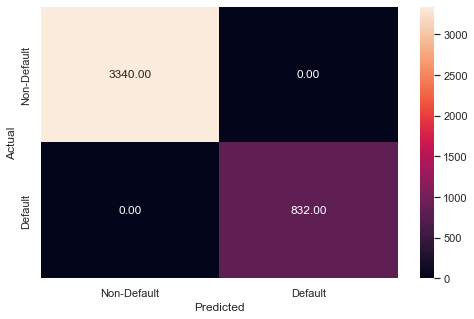

In [41]:
y_train_pred_dt =dt.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a 100% score for all metrics on the training dataset.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1431
           1       0.72      0.64      0.67       357

    accuracy                           0.88      1788
   macro avg       0.81      0.79      0.80      1788
weighted avg       0.87      0.88      0.87      1788



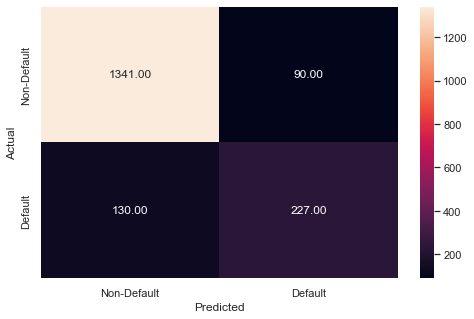

In [42]:
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

**Insights**

- The Decision Tree works well on the training data but not so well on the test data as the class 1 recall is 0.64 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 33% (1 - 0.67) chance that the model will predict that a borrower is going to default even though he/she would not, and the bank will as a result turn down legit customers and suffer from lost profit. 

### **Model 5 : Decision Tree - Hyperparameter Tuning**

#### Using GridSearchCV for Hyperparameter tuning on the model

In [45]:
# Choose the type of classifier. 
dtree_estimator=DecisionTreeClassifier(class_weight={0:0.2, 1:0.8})

# Grid of parameters to choose from
parameters = { 'criterion':['gini','entropy'],
              'max_depth': np.arange(5,8),
              'min_samples_leaf':[5, 10, 25, 100]
              }

# Type of scoring used to compare parameter combinations
scorer= metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring = scorer, n_jobs=-1, cv=10)  # n_jobs? 

# Fit the GridSearch on train dataset
gridCV=gridCV.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = gridCV.best_estimator_

# Fit the best algorithm to the data. 
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=7, min_samples_leaf=100)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3340
           1       0.57      0.80      0.67       832

    accuracy                           0.84      4172
   macro avg       0.76      0.83      0.78      4172
weighted avg       0.87      0.84      0.85      4172



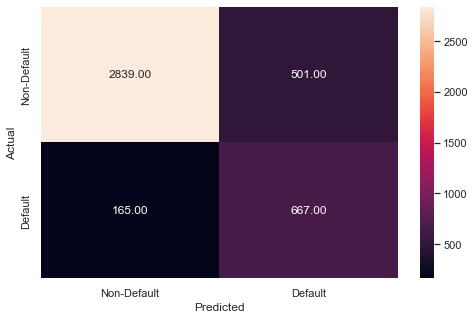

In [46]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = dt_tuned.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1431
           1       0.56      0.80      0.66       357

    accuracy                           0.83      1788
   macro avg       0.75      0.82      0.77      1788
weighted avg       0.87      0.83      0.84      1788



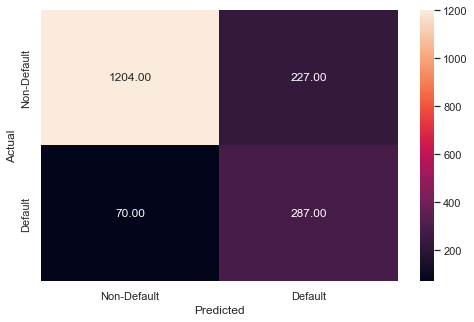

In [47]:
# Checking performance on the testing data based on the tuned model
y_test_pred_dt=dt_tuned.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

**Insights**

- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down. This makes sense because we are trying to reduce overfitting.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- For test data, class 1 recall has improved significantly which is desirable, i.e., the model can pick up a lot more true defaulting potential clients.
- For test data, class 1 precision has gone down in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the borrower is going to default even if they won't, and this will cost lost business to the bank. 

#### Plotting the Decision Tree

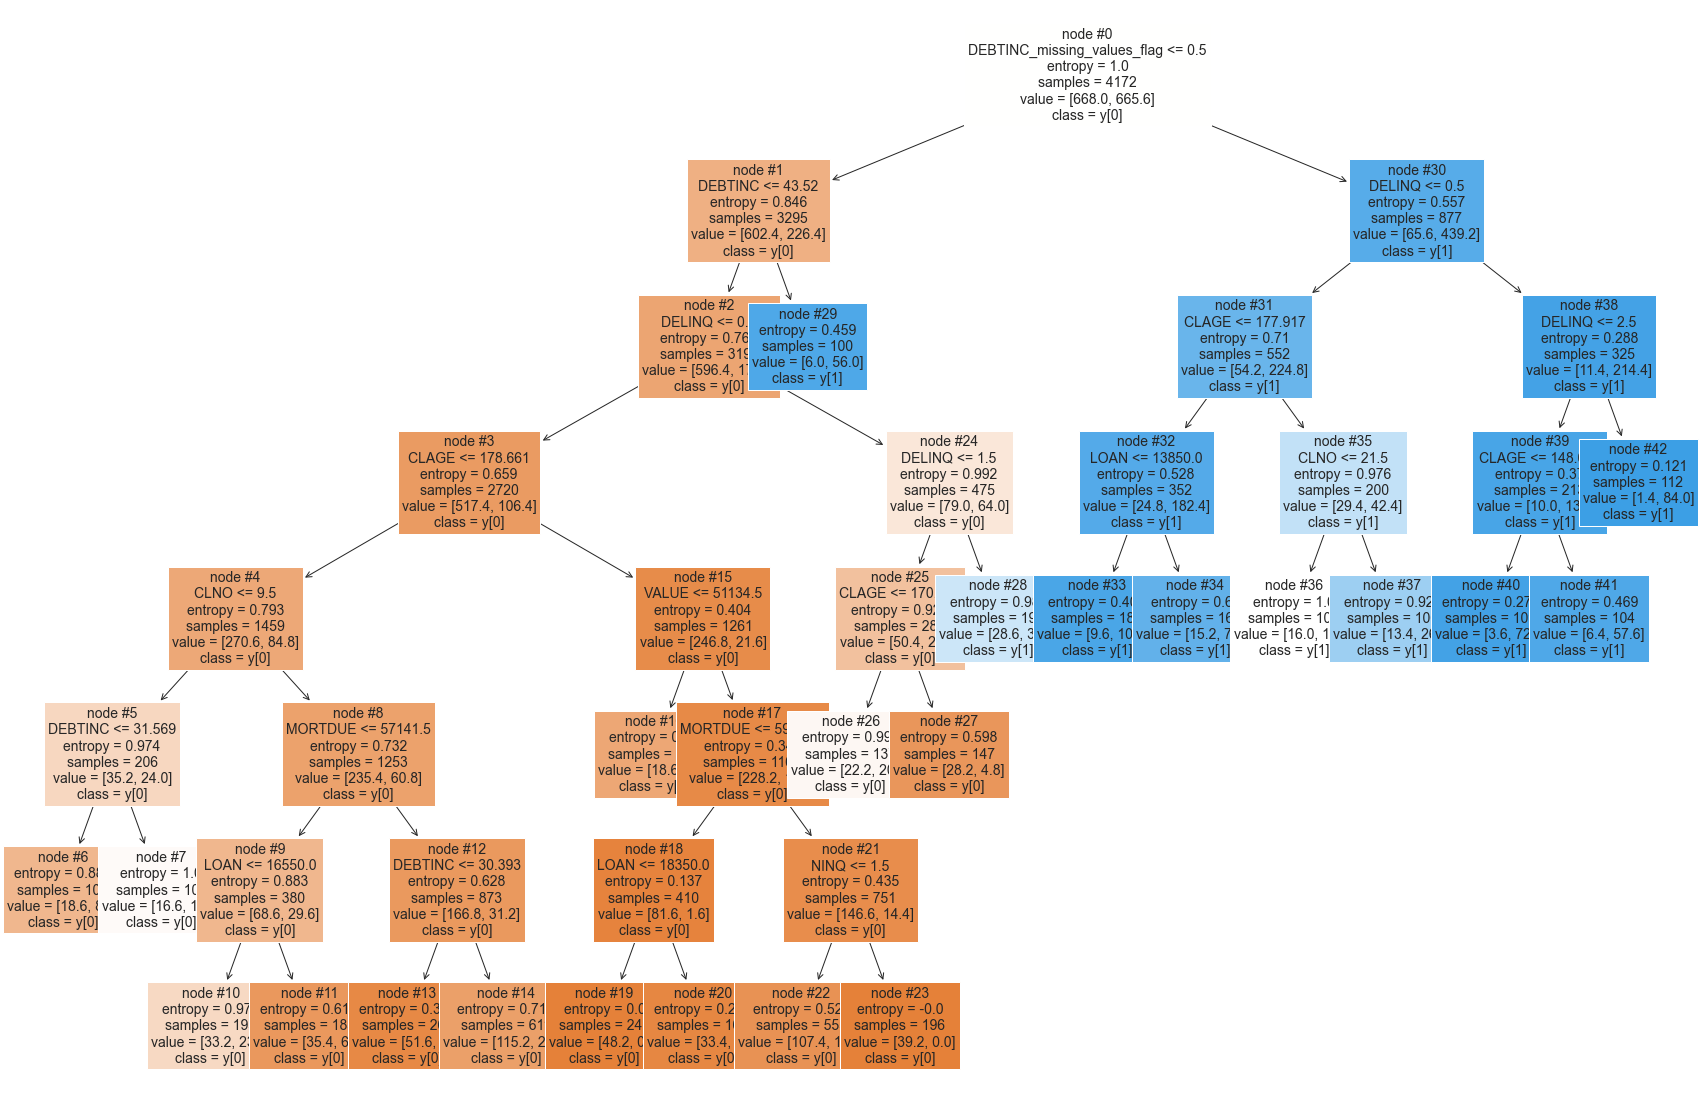

In [48]:
# Plot the decision tree and analyze it to build the decision rule
features = list(X.columns)
plt.figure(figsize=(30,20))
tree.plot_tree(dt_tuned,feature_names=features, filled=True, fontsize=14, node_ids=True, class_names=True)
plt.show()

#### Business rules apparent from the Decision Tree: 
* Step 1: If the DEBTINC (debt-to-income ratio) value is missing, reject the loan application. 
* Step 2: If the DEBTINC value is not missing, check if the DEBTINC value is larger than 43.5. If yes, reject the application. 
* Step 3: If the DEBTINC value is smaller or equal to 42.9, check if the DELINQ value (number of delinquent credit lines) is larger than 1.5. If yes, reject the application. If not, approve the application. 

### **Model 6: Random Forest Classifier**

In [49]:
# Defining Random forest CLassifier
rf = RandomForestClassifier(criterion='entropy', random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



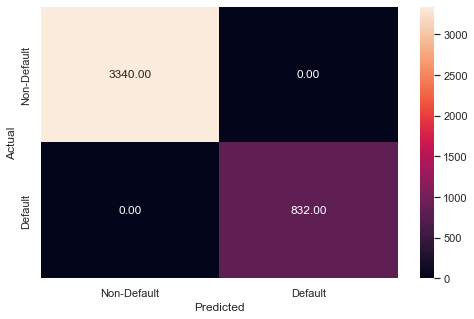

In [50]:
#Checking performance on the training data
y_train_pred_rf=rf.predict(x_train)
metrics_score(y_train, y_train_pred_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1431
           1       0.79      0.70      0.74       357

    accuracy                           0.90      1788
   macro avg       0.86      0.83      0.84      1788
weighted avg       0.90      0.90      0.90      1788



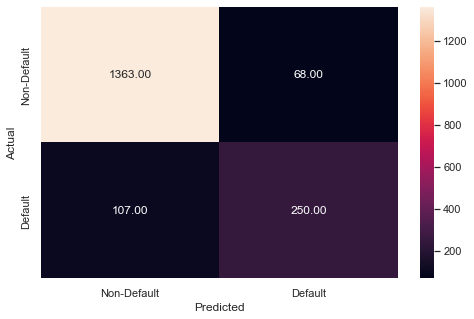

In [51]:
# Checking performance on the test data
y_test_pred_rf=rf.predict(x_test)
metrics_score(y_test, y_test_pred_rf)

**Observations:**
* The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 0.7 for class 1.
* The Random Forest classifier performs better than the untuned decision tree classifier on both Class 1 recall and Class 1 precision. 

### **Model 7: Tuning the Random Forest**

In [52]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy")

# Grid of parameters to choose from
parameters = {"n_estimators": [200, 500],
  "max_depth": [5, 6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "class_weight":["balanced",{0: 0.2, 1: 0.8}]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.9, min_samples_leaf=25,
                       n_estimators=500)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3340
           1       0.70      0.80      0.75       832

    accuracy                           0.89      4172
   macro avg       0.82      0.86      0.84      4172
weighted avg       0.90      0.89      0.89      4172



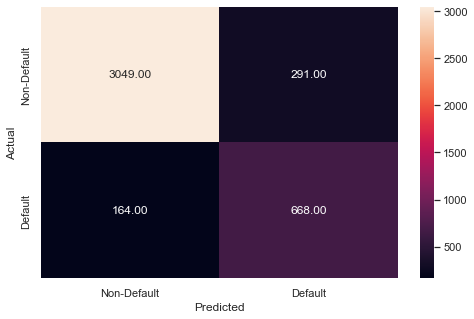

In [53]:
# Checking performance on the training data
y_train_pred_rf_tuned = rf_tuned.predict(x_train)
metrics_score(y_train, y_train_pred_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1431
           1       0.64      0.76      0.69       357

    accuracy                           0.87      1788
   macro avg       0.79      0.82      0.80      1788
weighted avg       0.88      0.87      0.87      1788



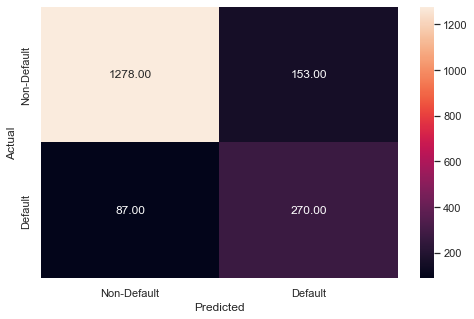

In [54]:
# Checking performace on test dataset
y_test_pred_rf_tuned = rf_tuned.predict(x_test)
metrics_score(y_test, y_test_pred_rf_tuned)

**Insights:**
* Compared to the default Random Forest Classifier, the tuned model is performing not as well on the train data as well. That is expected as we are reducing the overfitting. The tuned Random Forest is less overfitted. 
* The performance on the test data went down as well and is still not optimal.

#### Plot the Feature importance of the tuned Random Forest

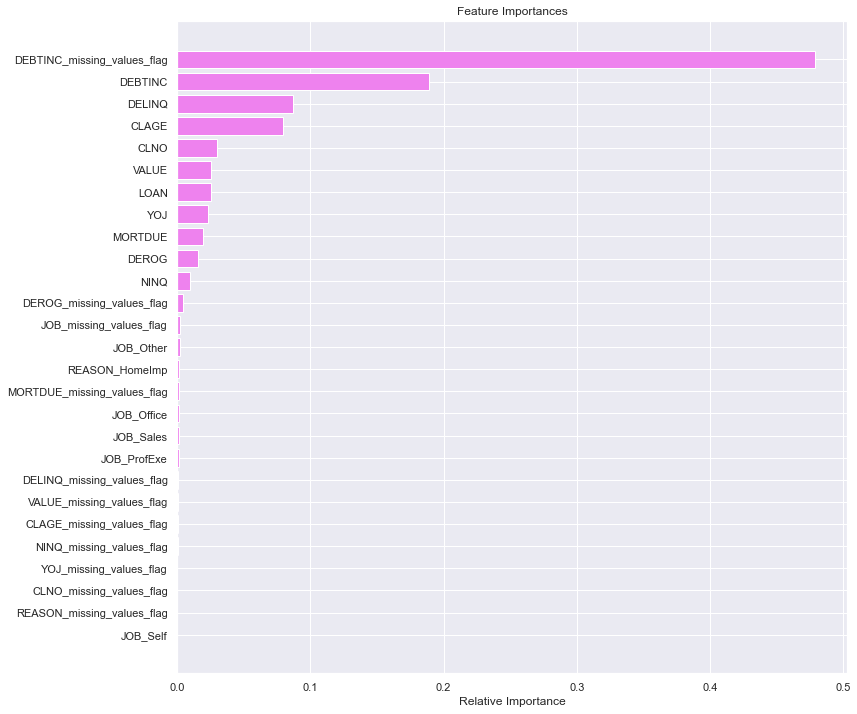

In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Obervation** 
* The most important factors including if the DEBTINC value is missing, DEBTINC, DELINQ, CLAGE. This is consistent with the EDA findings.

### **Comparing Model Performances**

In [56]:
def get_recall_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [57]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [58]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [60]:
# Make the list of all the model names 
models = [lr, lda, qda, dt, dt_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [62]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'LDA', 'QDA', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}, index=range(1,8))
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
1,Logistic Regression,0.893576,0.881991,0.612981,0.613445,0.806962,0.750000
2,LDA,0.886385,0.883110,0.659856,0.672269,0.741892,0.722892
3,QDA,0.851390,0.854027,0.552885,0.571429,0.649718,0.653846
4,Decision Tree,1.000000,0.876957,1.000000,0.635854,1.000000,0.716088
5,Tuned Decision Tree,0.840364,0.833893,0.801683,0.803922,0.571062,0.558366
6,Random Forest,1.000000,0.902125,1.000000,0.700280,1.000000,0.786164
7,Tuned Random Forest,0.890940,0.865772,0.802885,0.756303,0.696559,0.638298


**Insights:**
* Overall, the best model is the Tuned Random Forest model, balancing all evaluation factors. 
* The Logistic Regression model is the worse performing model as the recall score is less than 5%, meaning the model fails to pick up defaulted borrowers almost completely. Even after setting the threshold to optimal level of 0.3, the recall score is still only below 45%, which is unacceptable.
* The problem of the untuned Decision Tree model and the untuned Random Forest model is that they are overfitting. They both perform perfectly on the Train dataset, but the performances on the Test dataset is much worse compared to the Train set. Comparing between these two untuned models, the Random Forest model performs better on the Test set than the Decision Tree model. It makes sense as the Random Forest model is an ensembled learning model and should improve the performance compared with a single Tree. 
* The Tuned Decision Tree is not overfitting anymore as expected, and the test recall score is 83.2% which is quite high. However, its Test precision score is only 52%, meaning we would have turned down too many good customers incorrectly. 
* The Tuned Random Forest model is not overfitting anymore expected, and with a Test recall score close to 70%. The Test precision score is close to 75% which means losing less legitimate customers compared to the Tuned Decision Tree model. The overall Test accuracy is over 85% which is high enough. However, we should probably try to turn the hyperparameters further to achieve a Test recall score over 70% in the next step. 
